# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information of about 10,000 movies collected from The Movie Database (TMDb), including budget and revenue. The columns in this datasets are:
id, homepage, original_title, overview, popularity, production_companies, release_date, tagline, vote_average


## Question(s) for Analysis

### 1) what is the correlation between revenue and budget


### 2) Does the popularity of the movie affect the revenue generated from that movie

### 3) Movies which had most and least profit

### 4) Average runtime of the movies

### 4) Movies which had the largest budget

In [30]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties
 

In [31]:
# Loading the dataset

movie_df= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
# this returns a tuple of the dimensions of the dataframe
movie_df.shape

(10866, 21)

In [33]:
# this returns the datatypes of the columns
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [34]:
# this displays a concise summary of the dataframe,
# including the number of missing values in each column
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [35]:
# this returns the number of unique values in each column
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [36]:
# to get the counts of duplicates
sum(movie_df.duplicated())

1

In [37]:
# to view missing value count for each feature
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning


### It is observed from the dataset that there is a duplicate data, some missing data and some extraneous columns that needs to be dropped

In [38]:
# to drop duplicate
movie_df.drop_duplicates(inplace = True)

In [39]:
# checking to see if duplicates have been dropped
sum(movie_df.duplicated())

0

In [40]:
#removing unnecessary data
movie_df.drop(['id', 'imdb_id', 'release_date', 'tagline', 'keywords', 'overview', 'production_companies', 'director', 'homepage'],axis=1, inplace=True)

In [41]:
# checking if the columns have been dropped
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

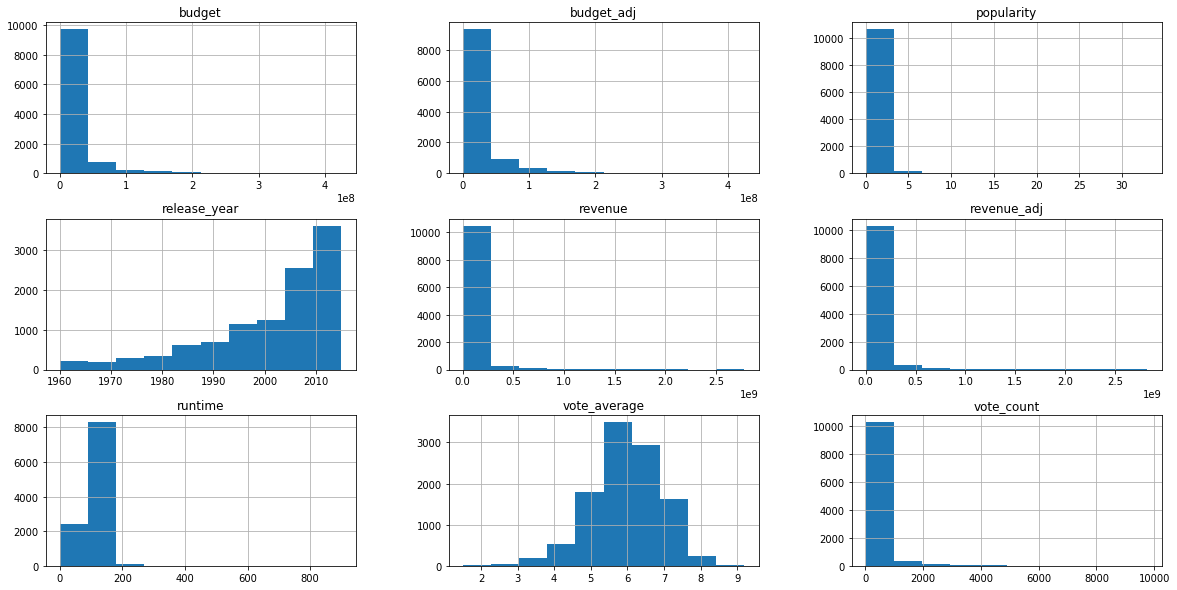

In [42]:
# finding patterns using visuals
movie_df.hist(figsize = (20, 10));

#### from the shape of the distribution, it is seen that popularity, budget, revenue, vote_count, budget_adj, revenue_adj are all skewed to the right, while runtime and release_year are skewed to the left

### Research Question 1 : what is the correlation between revenue and budget

In [43]:
movie_df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.734928
revenue,0.734928,1.000000


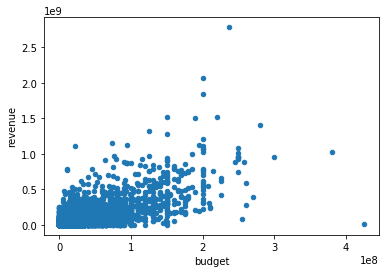

In [44]:
# plotting a scatter plot to visualizze the correlation
movie_df.plot(x = 'budget', y = 'revenue', kind = 'scatter');

#### There is a positive correlation between budget and revenue (0.73)

### Research Question 2: Does the popularity of the movie affect the revenue generated from that movie 

In [45]:
movie_df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.00000,0.66336
revenue,0.66336,1.00000


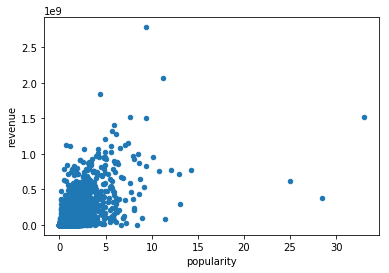

In [46]:
# plotting a scatter plot to visualizze the correlation
movie_df.plot(x = 'popularity', y = 'revenue', kind = 'scatter');

#### From the scatter plot above, there is a positive correlation between popularity and revenue

### Research Question 3 : Movies which had most and least profit

In [47]:
# calculating the profit of each movie
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
movie_df.insert(3,'profit_earned',movie_df['revenue']-movie_df['budget'])

#previewing the changes in the dataset
movie_df.head(2)

,popularity,budget,revenue,profit_earned,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [48]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= movie_df[column].idxmax()
    high_details=pd.DataFrame(movie_df.loc[high])
    
    #for lowest earned profit
    low= movie_df[column].idxmin()
    low_details=pd.DataFrame(movie_df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4


#### Column with id 1386 shows the highest earned profit i.e 2544505847

#### Column with id 2244 shows the least earned profit i.e -413912431  

### Research Question 4: Average runtime of the movies

In [49]:
# defining a function to find average of a column
def avg_fun(column):
    return movie_df[column].mean()

In [50]:
#calling above function
avg_fun('runtime')

102.07179015186378

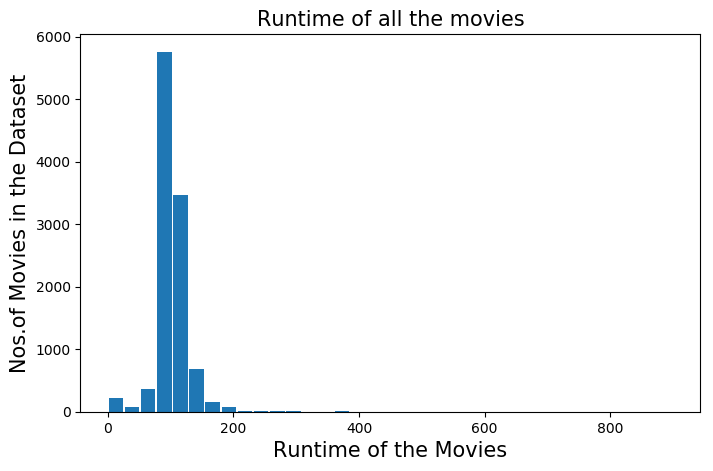

In [51]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(8,5), dpi = 100)
plt.xlabel('Runtime of the Movies', fontsize = 15)
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(movie_df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

#### The distribution of the above graph is right skewed, thus the average runtime is greater than the median

### Question 4: Movies with largest budget

In [53]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,30
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
profit_earned,-413912431,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
vote_count,74,425
vote_average,6.4,6.4


#### The movie with the highest budget is The warriors way with a budger of 425000000

<a id='conclusions'></a>
## Conclusions
The average runtime of a movie is 102 minutes, most of the movies are timed within 80 to 100mins

The movie 'avatar' which has a budget of 237000000 gave a profit of 2544505847 while the movie 'The warrior's way' which had the highest budget of 425000000  made a loss of -413912431. Therefore, it can not be implied that the higher the budget, the higher the profit made.


### Limitations
1. The budget and revenue columns do not have currency unit.
2. Some values are missing which will affect the accuracy of analysis

Reference
> https://geeksforgeeks.org

> https://github.com

